In [1]:
import pandas as pd
import re
import ast
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_csv(file_path):
    # Leggiamo il file CSV come testo grezzo
    with open(file_path, 'r') as file:
        lines = file.readlines()

    lines = [line for idx, line in enumerate(lines) if idx % 2 == 0]


    data = []
    sampled_pops = []

    # Elaboriamo manualmente ogni riga
    for line in lines:

        parts = line.strip().split(',')

        # Aggiungiamo la riga di dati alla lista data
        row_data = [float(part) for part in parts[:16]]
        row_data[0] = row_data[0] / 525600 # Trasformiamo minuti in anni
        data.append(row_data)

        #Aggiungiamo il campione del numero di bonobo alla lista sampled_pops
        sampled_pop = [int(re.sub(r'\D', '', s)) for s in parts[16:]]
        sampled_pops.append( sampled_pop )


    # Crea un DataFrame dai dati elaborati
    df = pd.DataFrame(data, columns=["time (years)", "foodAvailability", "newPredatorsPerMonth", "monthlyDiseaseIncidenceRate", "initial_number_males", "initial_number_females", "newBorns", "killedBonobos", "deadBonobos", "deadForDiseaseBonobos", "deadForStarvationBonobos", "averageAgeOfDeath", "hoursSpentCopulating", "hoursSpentForaging", "hoursSpentSleeping", "hoursSpentExploring"])
    df['sampledPopulation'] = sampled_pops
    return df

In [3]:
food_df = read_csv('./log/log_food_availability_variation.csv')
disease_df = read_csv('./log/log_disease_variation.csv')
population_df = read_csv('./log/log_population_variation.csv')
predator_df = read_csv('./log/log_predator_variation.csv')

## Food Availability Variation

In [180]:
grouped_food_df = food_df.groupby('foodAvailability').mean().reset_index()

In [181]:
grouped_food_df

,foodAvailability,time (years),newPredatorsPerMonth,monthlyDiseaseIncidenceRate,initial_number_males,initial_number_females,newBorns,killedBonobos,deadBonobos,deadForDiseaseBonobos,deadForStarvationBonobos,averageAgeOfDeath,hoursSpentCopulating,hoursSpentForaging,hoursSpentSleeping,hoursSpentExploring
0,1.0,1.564278,0.0,5.0,25.0,25.0,1.23,0.0,51.23,15.38,35.85,6.113376,1653.074717,2.115440e+04,18319.33,9259.965439
1,2.0,3.044217,0.0,5.0,25.0,25.0,10.22,0.0,60.22,32.40,27.82,5.762005,10151.027789,5.664878e+04,78543.73,31773.511139
2,3.0,5.034719,0.0,5.0,25.0,25.0,27.39,0.0,77.39,55.98,21.41,5.354794,25932.762124,9.761328e+04,201596.00,68024.318428
3,4.0,10.587877,0.0,5.0,25.0,25.0,105.78,0.0,145.30,123.72,21.58,4.911557,86302.812176,2.226046e+05,842614.11,203117.203077
4,5.0,14.941392,0.0,5.0,25.0,25.0,195.52,0.0,214.26,178.86,35.40,5.071668,186299.855740,4.729320e+05,1625380.32,402089.803617
5,6.0,17.393675,0.0,5.0,25.0,25.0,264.46,0.0,260.25,207.54,52.71,5.325268,272055.726093,7.029050e+05,2250866.48,597748.260406
6,7.0,17.697624,0.0,5.0,25.0,25.0,308.29,0.0,286.56,214.45,72.11,5.382707,313538.510105,8.934888e+05,2686194.92,700256.360894
7,8.0,18.707184,0.0,5.0,25.0,25.0,361.66,0.0,310.41,226.58,83.83,5.357721,360006.036505,1.022805e+06,3169389.02,800372.030773
8,9.0,17.988080,0.0,5.0,25.0,25.0,370.05,0.0,308.46,218.57,89.89,5.365296,372647.809672,1.072572e+06,3239584.90,797613.284889
9,10.0,17.548933,0.0,5.0,25.0,25.0,368.81,0.0,305.74,214.84,90.90,5.347416,364968.447214,1.029896e+06,3236342.84,774990.961378


#### How does the growth trend of the bonobo population change with varying available food? 

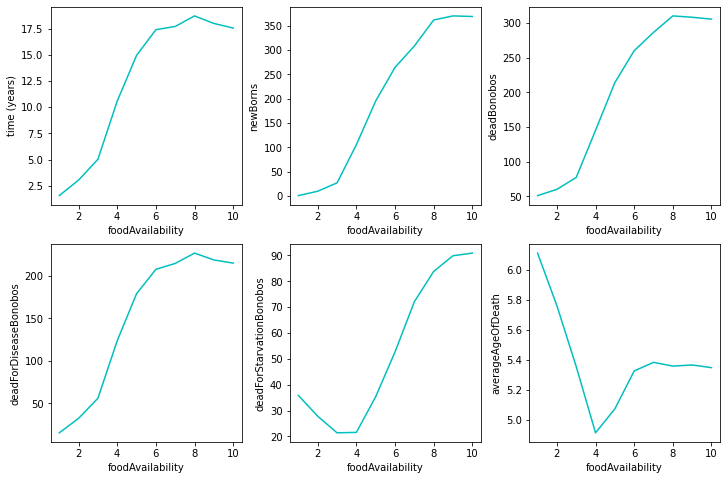

In [182]:
colonne_da_plottare = ['time (years)', 'newBorns', 'deadBonobos', 'deadForDiseaseBonobos', 'deadForStarvationBonobos', 'averageAgeOfDeath']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flatten() 

# Itera attraverso le colonne e crea i plot
for i, colonna in enumerate(colonne_da_plottare):
    ax = axes[i]
    ax.plot(grouped_food_df['foodAvailability'], grouped_food_df[colonna], color='c')
    ax.set_xlabel('foodAvailability')
    ax.set_ylabel(colonna)

plt.subplots_adjust(wspace=0.25)

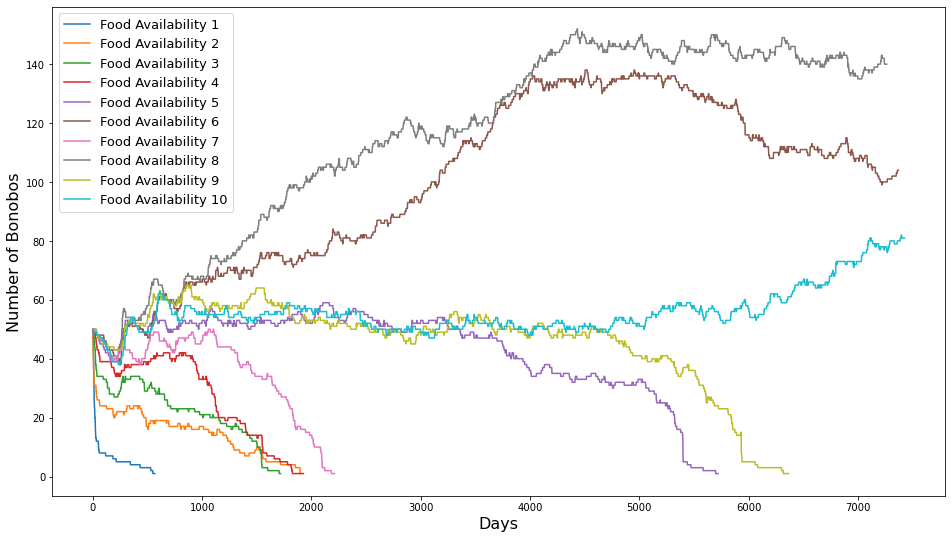

In [124]:
sequence1 = food_df[food_df['foodAvailability']==1]['sampledPopulation'][0]
sequence2 = food_df[food_df['foodAvailability']==2]['sampledPopulation'][5]
sequence3 = food_df[food_df['foodAvailability']==3]['sampledPopulation'][6]
sequence4 = food_df[food_df['foodAvailability']==4]['sampledPopulation'][12]
sequence5 = food_df[food_df['foodAvailability']==5]['sampledPopulation'][43]
sequence6 = food_df[food_df['foodAvailability']==6]['sampledPopulation'][112]
sequence7 = food_df[food_df['foodAvailability']==7]['sampledPopulation'][11]
sequence8 = food_df[food_df['foodAvailability']==8]['sampledPopulation'][115]
sequence9 = food_df[food_df['foodAvailability']==9]['sampledPopulation'][205]
sequence10 = food_df[food_df['foodAvailability']==10]['sampledPopulation'][306]

x_axis = np.arange(max(len(sequence1), len(sequence2), len(sequence3), len(sequence4),
                       len(sequence5), len(sequence6), len(sequence7), len(sequence8),
                       len(sequence9), len(sequence10)))

fig, ax = plt.subplots(figsize=(16, 9))

# Plot the sequences on the same plot
ax.plot(x_axis[:len(sequence1)], sequence1, label='Food Availability 1')
ax.plot(x_axis[:len(sequence2)], sequence2, label='Food Availability 2')
ax.plot(x_axis[:len(sequence3)], sequence3, label='Food Availability 3')
ax.plot(x_axis[:len(sequence4)], sequence4, label='Food Availability 4')
ax.plot(x_axis[:len(sequence5)], sequence5, label='Food Availability 5')
ax.plot(x_axis[:len(sequence6)], sequence6, label='Food Availability 6')
ax.plot(x_axis[:len(sequence7)], sequence7, label='Food Availability 7')
ax.plot(x_axis[:len(sequence8)], sequence8, label='Food Availability 8')
ax.plot(x_axis[:len(sequence9)], sequence9, label='Food Availability 9')
ax.plot(x_axis[:len(sequence10)], sequence10, label='Food Availability 10')

# Add labels and a legend
ax.set_xlabel('Days', fontsize=16)
ax.set_ylabel('Number of Bonobos', fontsize=16)
ax.legend(fontsize=13)

# Show the plot
plt.show()

#### Do bonobos have time for other activities when there's more food available? 

No handles with labels found to put in legend.


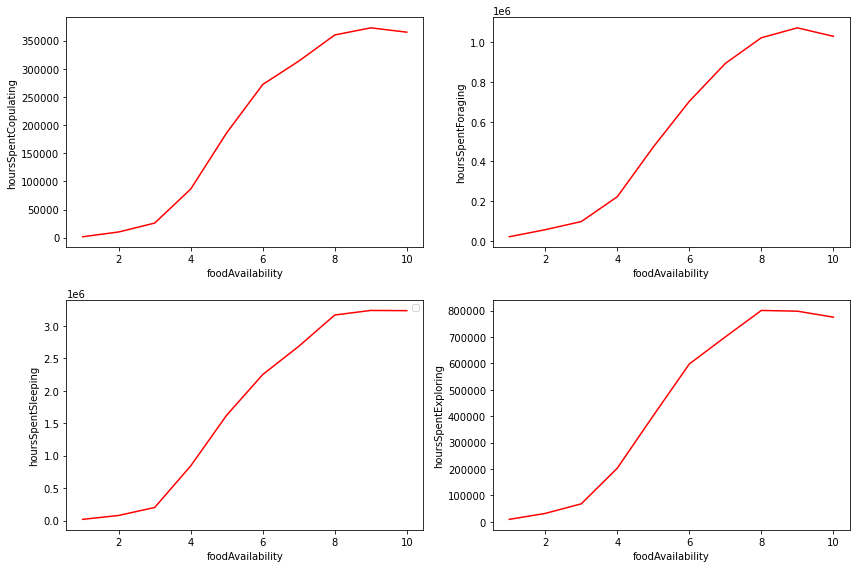

In [62]:
colonne_da_plottare = ['hoursSpentCopulating','hoursSpentForaging','hoursSpentSleeping', 'hoursSpentExploring']

# Itera attraverso le colonne e crea i plot

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()  

for i, colonna in enumerate(colonne_da_plottare):
    ax = axes[i]
    ax.plot(grouped_food_df['foodAvailability'], grouped_food_df[colonna], color='r')
    ax.set_xlabel('foodAvailability')
    ax.set_ylabel(colonna)

plt.tight_layout()
axes[2].legend(loc='upper right', fontsize='small')

## Initial Population Variation

In [63]:
# I consider only populations composed by 50 individuals
population_df = population_df[ population_df['initial_number_males'] + population_df['initial_number_females'] == 50]

In [64]:
grouped_population_df = population_df.groupby(['initial_number_males', 'initial_number_females']).mean().reset_index()

In [65]:
grouped_population_df['males_female_ratio'] = list(zip(grouped_population_df['initial_number_males'], grouped_population_df['initial_number_females']))

In [66]:
grouped_population_df

,initial_number_males,initial_number_females,time (years),foodAvailability,newPredatorsPerMonth,monthlyDiseaseIncidenceRate,newBorns,killedBonobos,deadBonobos,deadForDiseaseBonobos,deadForStarvationBonobos,averageAgeOfDeath,hoursSpentCopulating,hoursSpentForaging,hoursSpentSleeping,hoursSpentExploring,males_female_ratio
0,5.0,45.0,10.272730,5.0,0.0,5.0,62.39,0.0,101.87,90.66,11.21,7.366933,23217.580605,253929.014570,1344405.53,369438.229762,"(5.0, 45.0)"
1,10.0,40.0,17.566345,5.0,0.0,5.0,264.44,0.0,273.83,202.48,71.35,5.507371,151423.828969,739384.469750,2670210.82,623233.004236,"(10.0, 40.0)"
2,15.0,35.0,19.449540,5.0,0.0,5.0,316.36,0.0,316.11,232.09,84.02,5.245856,223069.131426,879129.084389,2808929.15,650334.229656,"(15.0, 35.0)"
3,20.0,30.0,19.250609,5.0,0.0,5.0,299.25,0.0,294.16,231.46,62.70,5.209349,255404.130636,780322.731091,2556118.77,609977.734555,"(20.0, 30.0)"
4,25.0,25.0,14.954123,5.0,0.0,5.0,189.30,0.0,208.55,178.94,29.61,5.071142,182592.772228,423153.266145,1556180.17,395582.290347,"(25.0, 25.0)"
5,30.0,20.0,9.949520,5.0,0.0,5.0,90.77,0.0,131.92,113.03,18.89,5.436681,102031.733445,227494.143878,718699.40,233207.958339,"(30.0, 20.0)"
6,35.0,15.0,6.647997,5.0,0.0,5.0,28.24,0.0,78.24,66.65,11.59,6.318234,43470.334986,126448.604811,208965.07,160777.243052,"(35.0, 15.0)"
7,40.0,10.0,6.160160,5.0,0.0,5.0,8.54,0.0,58.54,51.34,7.20,7.586886,16832.444979,102166.772402,69785.05,167345.725677,"(40.0, 10.0)"
8,45.0,5.0,6.694203,5.0,0.0,5.0,1.09,0.0,51.09,46.03,5.06,8.700701,3886.351348,92566.854109,17798.53,195382.707321,"(45.0, 5.0)"


In [67]:
def plot_grouped_population(column, ax):
    # Creare un dizionario per tenere traccia dei valori y per ciascuna tupla x
    tupla_values = {}
    for index, row in grouped_population_df.iterrows():
        tupla_x = row['males_female_ratio']
        valore_y = row[column]
        if tupla_x not in tupla_values:
            tupla_values[tupla_x] = []
        tupla_values[tupla_x].append(valore_y)

    # Creare il grafico
    for tupla_x, y_values in tupla_values.items():
        x_label = f'({tupla_x[0]}, {tupla_x[1]})'
        ax.plot([x_label] * len(y_values), y_values, marker='o', label=tupla_x)

    ax.set_xlabel('(#Males, #Females)')
    ax.set_ylabel(column)
    ax.set_xticks([])

#### How does the population growth vary based on the population size of females and males?

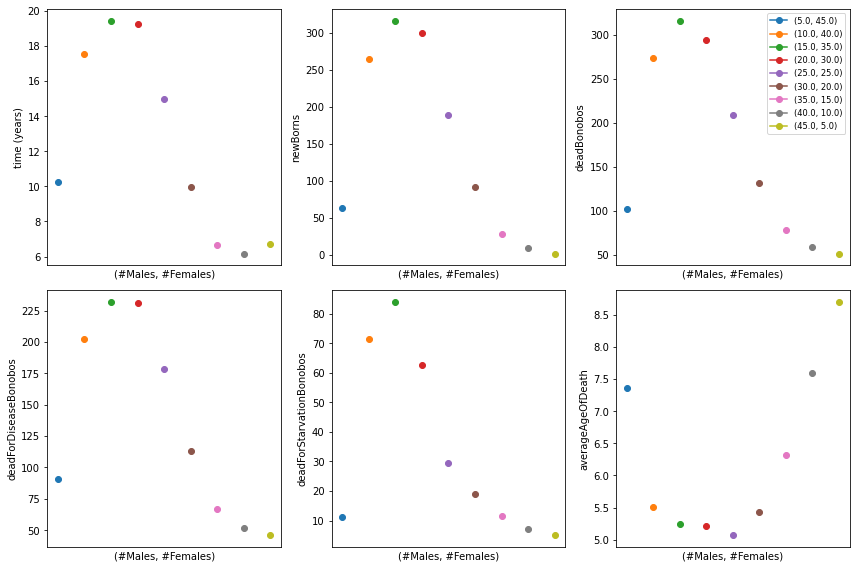

In [68]:
colonne_da_plottare = ['time (years)', 'newBorns', 'deadBonobos', 'deadForDiseaseBonobos', 'deadForStarvationBonobos', 'averageAgeOfDeath']

# Itera attraverso le colonne e crea i plot

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flatten()  

for i, colonna in enumerate(colonne_da_plottare):
    ax = axes[i]
    plot_grouped_population(colonna, ax)

plt.tight_layout()
axes[2].legend(loc='upper right', fontsize='small')

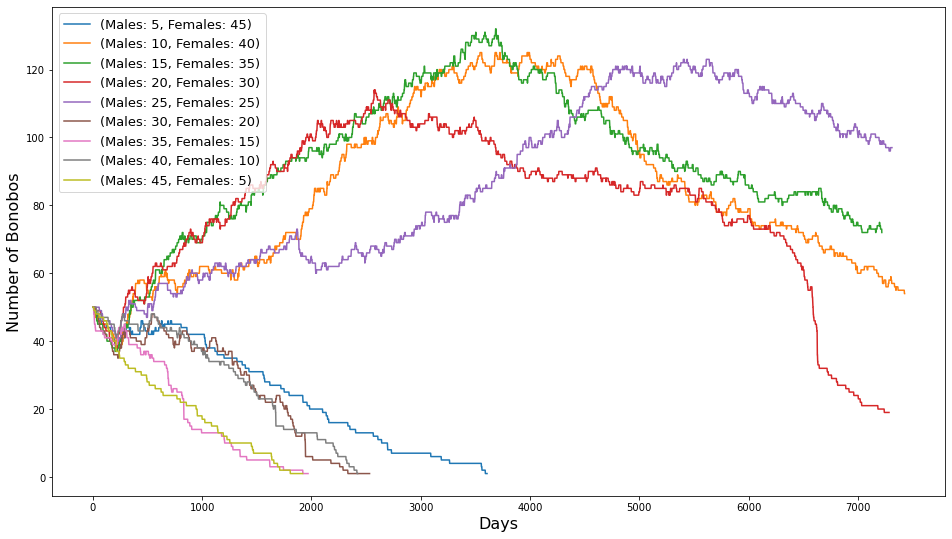

In [166]:
sequence1 = population_df.iloc[0]['sampledPopulation'] # Males: 5, Females: 45
sequence2 = population_df.iloc[200]['sampledPopulation'] # Males: 10, Females: 40
sequence3 = population_df.iloc[250]['sampledPopulation'] # Males: 15, Females: 35
sequence4 = population_df.iloc[300]['sampledPopulation'] # Males: 20, Females: 30
sequence5 = population_df.iloc[400]['sampledPopulation'] # Males: 25, Females: 25
sequence6 = population_df.iloc[500]['sampledPopulation'] # Males: 30, Females: 20
sequence7 = population_df.iloc[600]['sampledPopulation'] # Males: 35, Females: 15
sequence8 = population_df.iloc[700]['sampledPopulation'] # Males: 40, Females: 10
sequence9 = population_df.iloc[800]['sampledPopulation'] # Males: 45, Females: 5

# Create a common x-axis for all sequences (you can adjust this based on your data)
x_axis = np.arange(max(len(sequence1), len(sequence2), len(sequence3), len(sequence4),
                       len(sequence5), len(sequence6), len(sequence7), len(sequence8),
                       len(sequence9)))

fig, ax = plt.subplots(figsize=(16, 9))

# Plot the sequences on the same plot
ax.plot(x_axis[:len(sequence1)], sequence1, label='(Males: 5, Females: 45)')
ax.plot(x_axis[:len(sequence2)], sequence2, label='(Males: 10, Females: 40)')
ax.plot(x_axis[:len(sequence3)], sequence3, label='(Males: 15, Females: 35)')
ax.plot(x_axis[:len(sequence4)], sequence4, label='(Males: 20, Females: 30)')
ax.plot(x_axis[:len(sequence5)], sequence5, label='(Males: 25, Females: 25)')
ax.plot(x_axis[:len(sequence6)], sequence6, label='(Males: 30, Females: 20)')
ax.plot(x_axis[:len(sequence7)], sequence7, label='(Males: 35, Females: 15)')
ax.plot(x_axis[:len(sequence8)], sequence8, label='(Males: 40, Females: 10)')
ax.plot(x_axis[:len(sequence9)], sequence9, label='(Males: 45, Females: 5)')

# Add labels and a legend
ax.set_xlabel('Days', fontsize=16)
ax.set_ylabel('Number of Bonobos', fontsize=16)
ax.legend(fontsize=13)

# Show the plot
plt.show()

## new Predators Per Month Variation

In [69]:
grouped_predators_df = predator_df.groupby('newPredatorsPerMonth').mean().reset_index()

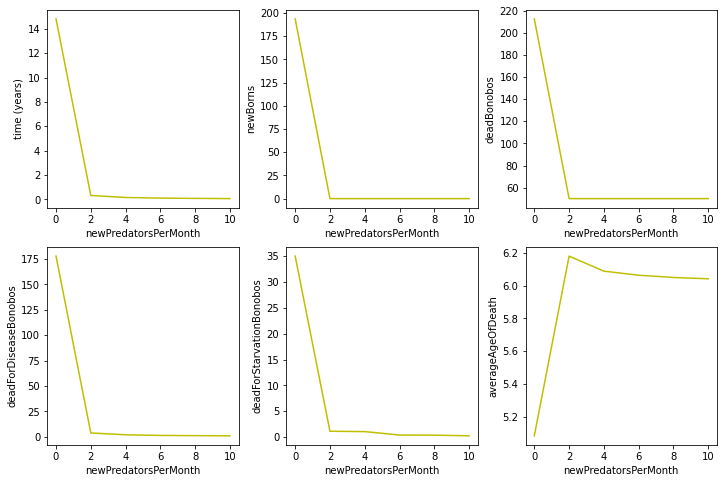

In [72]:
colonne_da_plottare = ['time (years)', 'newBorns', 'deadBonobos', 'deadForDiseaseBonobos', 'deadForStarvationBonobos', 'averageAgeOfDeath']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flatten()

# Itera attraverso le colonne e crea i plot
for i, colonna in enumerate(colonne_da_plottare):
    ax = axes[i]
    ax.plot(grouped_predators_df['newPredatorsPerMonth'], grouped_predators_df[colonna], color='y')
    ax.set_xlabel('newPredatorsPerMonth')
    ax.set_ylabel(colonna)
    #plt.title(f'Relation between foodAvailability and {colonna}')

plt.subplots_adjust(wspace=0.25)

## Disease Incidence Rate

In [4]:
grouped_disease_df = disease_df.groupby('monthlyDiseaseIncidenceRate').mean().reset_index()

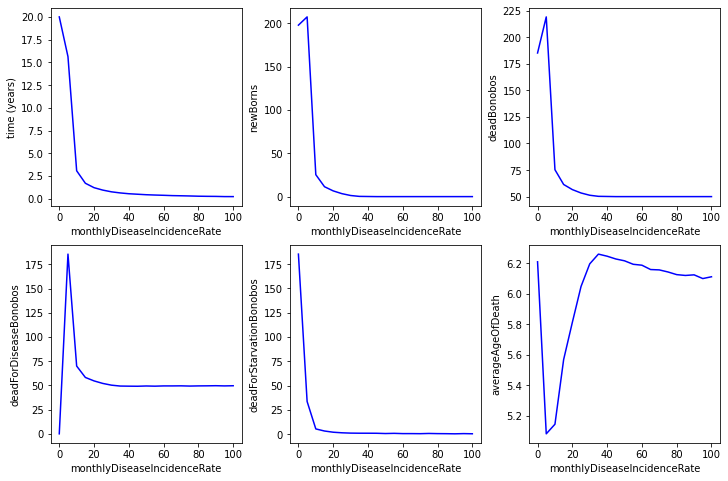

In [172]:
colonne_da_plottare = ['time (years)', 'newBorns', 'deadBonobos', 'deadForDiseaseBonobos', 'deadForStarvationBonobos', 'averageAgeOfDeath']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flatten()

# Itera attraverso le colonne e crea i plot
for i, colonna in enumerate(colonne_da_plottare):
    ax = axes[i]
    ax.plot(grouped_disease_df['monthlyDiseaseIncidenceRate'], grouped_disease_df[colonna], color='b')
    ax.set_xlabel('monthlyDiseaseIncidenceRate')
    ax.set_ylabel(colonna)
    #plt.title(f'Relation between foodAvailability and {colonna}')

plt.subplots_adjust(wspace=0.25)